# LightGBM
## 범주형

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/빅데이터 팀플/dementia_analytics/"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 로딩 ### 
train_dataset = pd.read_csv(path + 'data_processing/dataset_03/training/train_dataset_with_label_fill_user_mean.csv')
valid_dataset = pd.read_csv(path + 'data_processing/dataset_03/validation/val_dataset_with_label_fill_user_mean.csv')

train_output = train_dataset[['DIAG_NM']]
train_input = train_dataset.drop(labels='ID', axis=1).drop(labels='date', axis=1).drop(labels='DIAG_NM', axis=1)

test_output = valid_dataset[['DIAG_NM']]
test_input = valid_dataset.drop(labels='ID', axis=1).drop(labels='date', axis=1).drop(labels='DIAG_NM', axis=1)

In [ ]:
### 레이블 인코딩 ### 

# 트리 기반 알고리즘에서는 숫자의 크기에 따른 중요도 차이가 없어 레이블 인코딩 OK
# 선형적 특징을 가지는 알고리즘들은 one hot encoding 통해 해결해야 함

from sklearn.preprocessing import LabelEncoder

# 라벨인코더 선언 및 Fitting
# CN : 0, Dem : 1, MCI : 2
items = ['CN', 'Dem', 'MCI']
encoder = LabelEncoder()
encoder.fit(items)

# train
train_output['DIAG_NM'] = encoder.transform(train_output['DIAG_NM'])
# display(encoder.classes_)
# display(encoder.inverse_transform(train_output['DIAG_NM']))

# test
test_output['DIAG_NM'] = encoder.transform(test_output['DIAG_NM'])

<ipython-input-34-e819ad067ec6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_output['DIAG_NM'] = encoder.transform(train_output['DIAG_NM'])
<ipython-input-34-e819ad067ec6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_output['DIAG_NM'] = encoder.transform(test_output['DIAG_NM'])


In [ ]:
### Light GBM ###
from lightgbm import LGBMClassifier

LGBM = LGBMClassifier()
evals = [(test_input, test_output)]
LGBM.fit(train_input, train_output, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
test_pred = LGBM.predict(test_input)
train_pred = LGBM.predict(train_input)
# pred_proba = LGBM.predict_proba(test_input)[:1]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a

[1]	valid_0's multi_logloss: 0.771776
[2]	valid_0's multi_logloss: 0.757952
[3]	valid_0's multi_logloss: 0.753709
[4]	valid_0's multi_logloss: 0.750249
[5]	valid_0's multi_logloss: 0.747479
[6]	valid_0's multi_logloss: 0.748699
[7]	valid_0's multi_logloss: 0.747799
[8]	valid_0's multi_logloss: 0.746531
[9]	valid_0's multi_logloss: 0.747189
[10]	valid_0's multi_logloss: 0.748491
[11]	valid_0's multi_logloss: 0.751003
[12]	valid_0's multi_logloss: 0.748881
[13]	valid_0's multi_logloss: 0.746526
[14]	valid_0's multi_logloss: 0.748332
[15]	valid_0's multi_logloss: 0.750429
[16]	valid_0's multi_logloss: 0.752215
[17]	valid_0's multi_logloss: 0.753424
[18]	valid_0's multi_logloss: 0.754155
[19]	valid_0's multi_logloss: 0.757205
[20]	valid_0's multi_logloss: 0.759198
[21]	valid_0's multi_logloss: 0.764377
[22]	valid_0's multi_logloss: 0.767628
[23]	valid_0's multi_logloss: 0.770411
[24]	valid_0's multi_logloss: 0.77154
[25]	valid_0's multi_logloss: 0.772976
[26]	valid_0's multi_logloss: 0.777

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(train_output, train_pred))
print(accuracy_score(test_output, test_pred))

0.8084862385321101
0.6886534518113465


<function matplotlib.pyplot.show(close=None, block=None)>

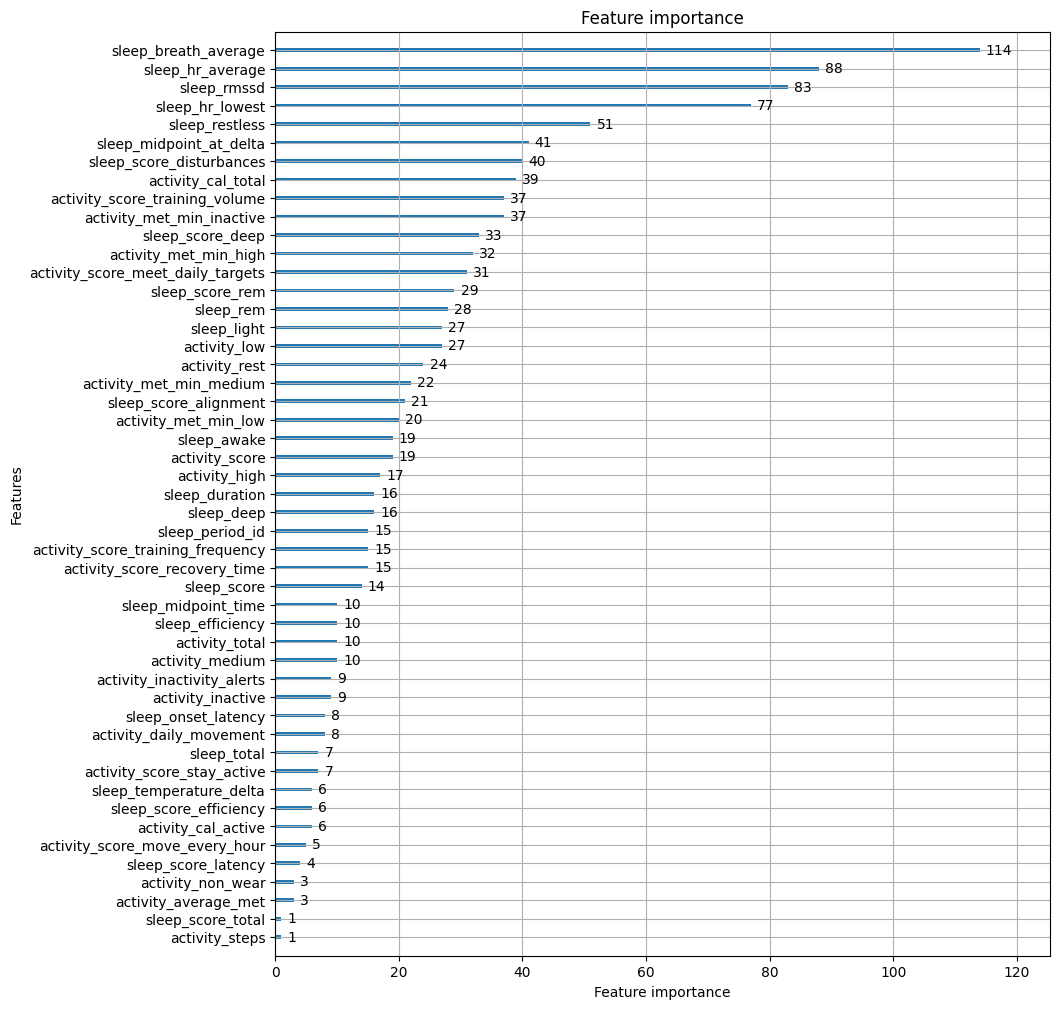

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LGBM, ax=ax)
plt.show

In [ ]:
### Light GBM  + GridSearchCV ###
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

param_grid = {
    'boosting_type': ['gbdt'],
    'max_depth' : [1, 2, 3, 4, 5],
    'num_leaves' : [3, 4, 5, 6, 7],
    'learning_rate' : [0.03, 0.05, 1.0, 0.2, 0.3],
    'objective' : ['multiclass'],
    'metric' : ['multi_logloss'],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators' : [5, 10, 15, 20],
    'num_class' : [1]
}

LGBM = LGBMClassifier()
grid_cv = GridSearchCV(LGBM, param_grid=param_grid, cv=3, scoring='f1_micro', n_jobs=4)
grid_cv.fit(train_input, train_output)

print(grid_cv.best_params_) 
print(grid_cv.best_score_)
train_preds = grid_cv.predict(train_input)
test_preds = grid_cv.predict(test_input)
train_f1 = f1_score(train_output, train_preds, average='micro')
test_f1 = f1_score(test_output, test_preds, average='micro')
# {'boosting_type': 'gbdt', 'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 3, 'metric': 'multi_logloss', 'n_estimators': 10, 'num_class': 1, 'num_leaves': 6, 'objective': 'multiclass', 'subsample': 0.5}
print("Train F1 Score:", train_f1) # Train F1 Score: 0.5991665728122536
print("Test F1 Score:", test_f1) # Test F1 Score: 0.7924195680916704

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


{'boosting_type': 'gbdt', 'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 3, 'metric': 'multi_logloss', 'n_estimators': 10, 'num_class': 1, 'num_leaves': 6, 'objective': 'multiclass', 'subsample': 0.5}
0.5992792259985568
Train F1 Score: 0.5991665728122536
Test F1 Score: 0.7924195680916704


In [ ]:
print(grid_cv.score(train_input, train_output)) # 0.5991665728122536
print(grid_cv.score(test_input, test_output)) # 0.7924195680916704

0.5991665728122536
0.7924195680916704
